In [117]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as smf
from sklearn.model_selection import train_test_split

In [150]:
data = pd.read_csv("auto-mpg.csv")
data.drop(["car name", "origin"], axis=1, inplace= True)
data = data.dropna()

In [110]:
data.columns=["MPG", "Cilindraje", "Desplazamiento", "Caballos de fuerza", "Peso", "Aceleracion", "Año modelo" ]

In [111]:
cols= ["Cilindraje", "Desplazamiento", "Caballos de fuerza", "Peso", "Aceleracion", "Año modelo" ]
x = data[cols]
y = np.log10(data["MPG"])
data["MPG"]=y

In [112]:
data2 = data[["MPG","Caballos de fuerza", "Peso","Año modelo"]]

In [114]:
## fit a OLS model with intercept on TV and Radio
X = smf.add_constant(x)
est = smf.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     446.2
Date:                Wed, 25 Sep 2019   Prob (F-statistic):          6.38e-170
Time:                        14:35:52   Log-Likelihood:                 600.48
No. Observations:                 392   AIC:                            -1187.
Df Residuals:                     385   BIC:                            -1159.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7937      0.073     10.845      0.000       0.650       0.938
Cilindraje            -0.0101      0.005     -1.982      0.048      -0.020   -7.89e-05
Desplazamiento         0.0001      0.000      1.104      0.270   -9.74e-05       0.000
Caballos de fuerza    -0.0004      0.000     -2.047      0.041      -0.001   -1.73e-05
Peso                  -0.0001   1.03e-05    -11.151      0.000      -0.000   -9.45e-05
Aceleracion           -0.0005      0.002     -0.336      0.737      -0.004       0.003
Año modelo             0.0129      0.001     15.930      0.000       0.011       0.014
==============================================================================
Omnibus:                        5.281   Durbin-Watson:                   1.343
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                7.132
Skew:                          -0.042   Prob(JB):                       0.0283
Kurtosis:                       3.655   Cond. No.                     8.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

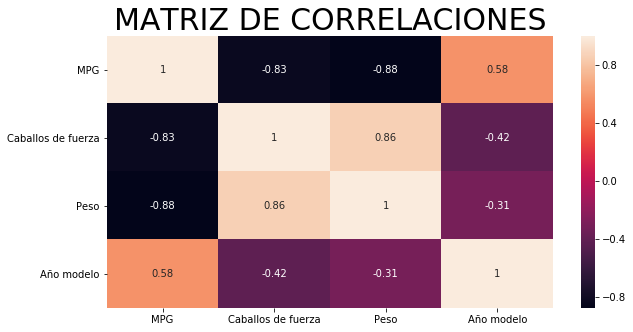

In [113]:
plt.figure(figsize=(10,5))
plt.title("MATRIZ DE CORRELACIONES", fontsize=30)
sns.heatmap(data2.corr(), annot=True)

In [181]:
data = pd.read_csv("auto-mpg.csv")
data.drop(["car name", "origin"], axis=1, inplace= True)
data = data.dropna()

In [182]:
data["model year"]=data["model year"].replace(70, 0)
data["model year"]=data["model year"].replace(71, 1)
data["model year"]=data["model year"].replace(72, 2)
data["model year"]=data["model year"].replace(73, 3)
data["model year"]=data["model year"].replace(74, 4)
data["model year"]=data["model year"].replace(75, 5)
data["model year"]=data["model year"].replace(76, 6)
data["model year"]=data["model year"].replace(77, 7)
data["model year"]=data["model year"].replace(78, 8)
data["model year"]=data["model year"].replace(79, 9)
data["model year"]=data["model year"].replace(80, 10)
data["model year"]=data["model year"].replace(81, 11)
data["model year"]=data["model year"].replace(82, 12)


In [183]:
train, test = train_test_split(data, test_size = 0.2)

In [184]:
test.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
331,40.8,4,85.0,65.0,2110,19.2,10
385,31.0,4,91.0,68.0,1970,17.6,12
52,18.0,6,258.0,110.0,2962,13.5,1
298,19.2,8,267.0,125.0,3605,15.0,9
151,31.0,4,76.0,52.0,1649,16.5,4


In [185]:
train.columns=["MPG", "Cilindraje", "Desplazamiento", "Caballos de fuerza", "Peso", "Aceleracion", "Año modelo" ]
test.columns=["MPG", "Cilindraje", "Desplazamiento", "Caballos de fuerza", "Peso", "Aceleracion", "Año modelo" ]

In [186]:
cols= ["Caballos de fuerza", "Peso","Año modelo" ]
x = train[cols]
y = np.log10(train["MPG"])
train["MPG"]=y

xtest = test[cols]
ytest = np.log10(test["MPG"])
test["MPG"]=ytest

C:\Users\Ulises Cabrera\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Ulises Cabrera\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [192]:
X = smf.add_constant(x)
est = smf.OLS(y, X).fit()
est.summary()

X2 = smf.add_constant(xtest)
est2 = smf.OLS(ytest, X2).fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     159.7
Date:                Thu, 26 Sep 2019   Prob (F-statistic):           1.73e-32
Time:                        10:40:27   Log-Likelihood:                 121.87
No. Observations:                  79   AIC:                            -235.7
Df Residuals:                      75   BIC:                            -226.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.6585      0.029     57.530      0.000       1.601       1.716
Caballos de fuerza    -0.0002      0.000     -0.630      0.531      -0.001       0.001
Peso                  -0.0001   1.56e-05     -7.788      0.000      -0.000   -9.04e-05
Año modelo             0.0117      0.002      6.087      0.000       0.008       0.016
==============================================================================
Omnibus:                        4.486   Durbin-Watson:                   2.257
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                5.425
Skew:                           0.124   Prob(JB):                       0.0664
Kurtosis:                       4.260   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [194]:
test["MPG"]

331    1.610660
385    1.491362
52     1.255273
298    1.283301
151    1.491362
358    1.536558
397    1.342423
299    1.267172
320    1.447158
104    1.255273
49     1.079181
210    1.469822
208    1.267172
316    1.618048
288    1.296665
248    1.342423
157    1.414973
349    1.477121
73     1.230449
107    1.255273
344    1.510545
92     1.113943
129    1.380211
63     1.414973
165    1.204120
180    1.380211
27     1.380211
3      1.204120
1      1.176091
255    1.557507
         ...   
395    1.579784
242    1.414973
182    1.462398
218    1.217484
371    1.350248
260    1.311754
352    1.545307
214    1.301030
396    1.414973
118    1.255273
223    1.498311
265    1.313867
374    1.245513
142    1.255273
113    1.079181
326    1.495544
137    1.414973
148    1.462398
354    1.568202
7      1.146128
296    1.227887
8      1.146128
271    1.257679
240    1.462398
16     1.146128
351    1.591065
9      1.176091
134    1.278754
91     1.431364
103    1.113943
Name: MPG, Length: 79, d

In [193]:
pred = est.predict(X2)
pred

331    1.519930
385    1.562012
52     1.279618
298    1.302710
151    1.500797
358    1.540998
397    1.440149
299    1.252198
320    1.441531
104    1.289246
49     1.011914
210    1.498391
208    1.264309
316    1.511278
288    1.392984
248    1.382354
157    1.394906
349    1.492387
73     1.191261
107    1.308297
344    1.495470
92     1.142906
129    1.342339
63     1.416810
165    1.132261
180    1.388095
27     1.338337
3      1.193291
1      1.155923
255    1.532541
         ...   
395    1.429855
242    1.457349
182    1.472115
218    1.239197
371    1.358276
260    1.355781
352    1.577192
214    1.326888
396    1.478404
118    1.414825
223    1.486597
265    1.324685
374    1.362707
142    1.243647
113    1.093067
326    1.464058
137    1.393141
148    1.419659
354    1.549376
7      1.061004
296    1.199846
8      1.043312
271    1.331465
240    1.494998
16     1.168060
351    1.561761
9      1.126716
134    1.330948
91     1.405243
103    1.176299
Length: 79, dtype: float

In [179]:
train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)

In [ ]:
cols= ["Caballos de fuerza", "Peso","Año modelo" ]
x = train[cols]
y = train["MPG"]
train["MPG"]=y

xtest = test[cols]
ytest = test["MPG"]
test["MPG"]=ytest